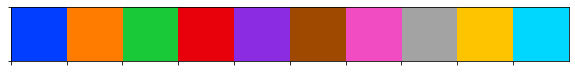

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/pcm-dpc/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv > ../external_data/dpc-covid19-ita-province.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-province.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  493k  100  493k    0     0   493k      0  0:00:01 --:--:--  0:00:01 1051k


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN
5,2020-02-24T18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,NaN,NaN
6,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,NaN,NaN
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN
8,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,21,Bolzano,BZ,46.499335,11.356624,0,NaN,NaN
9,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,981,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates

In [4]:
for i, (name, group) in enumerate(data.groupby('denominazione_provincia')):
    if name == 'In fase di definizione/aggiornamento': continue
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='left', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    # print(name, len(conf))
    # print(conf)
    # if i>2: break
    # deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    # deaths.rename(columns={"deceduti": name}, inplace=True)
    # tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    # tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
conf.drop_duplicates(subset=None, keep='first', inplace=True)

conf.head()

,Agrigento,Alessandria,Ancona,Aosta,Arezzo,Ascoli Piceno,Asti,Avellino,Bari,Barletta-Andria-Trani,...,Trieste,Udine,Varese,Venezia,Verbano-Cusio-Ossola,Vercelli,Verona,Vibo Valentia,Vicenza,Viterbo
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,0,0,0,0,0
2020-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,0
2020-02-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,14,0,0,0,0,3,0
2020-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,3,15,0,0,0,0,3,0


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Milano                   13268
Brescia                  10599
Bergamo                  10258
Torino                    7605
Cremona                   4658
Reggio nell'Emilia        3765
Monza e della Brianza     3575
Verona                    3402
Padova                    3250
Roma                      3219
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Agrigento         123
Alessandria      2191
Ancona           1547
Aosta             902
Arezzo            417
                 ... 
Vercelli          789
Verona           3402
Vibo Valentia      68
Vicenza          2009
Viterbo           313
Length: 107, dtype: int64


In [7]:
def make_plot(dataset="", contries_ordered="", plot_countries_opt=1,
              nrow=2,ncol=2,plot_countries_option = 1, title="", 
              xlabel="", ylabel="", logy=False, logx=False):
    count=0
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

    for r in range(nrow):
        for c in range(ncol):
            if plot_countries_opt == 1:
                # plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)].index
                plot_countries = contries_ordered[count*5:(count+1)*5].index
            else:
                # plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)]
                plot_countries = contries_ordered[count*5:(count+1)*5]
                
            dataset[plot_countries].plot(logy=logy, logx=logx, grid=True, ax=axes[r,c], title=title, figsize = (20,10./2*nrow))
            axes[r,c].set_xlabel(xlabel, fontsize=15)
            axes[r,c].set_ylabel(ylabel, fontsize=15)
            count+=1

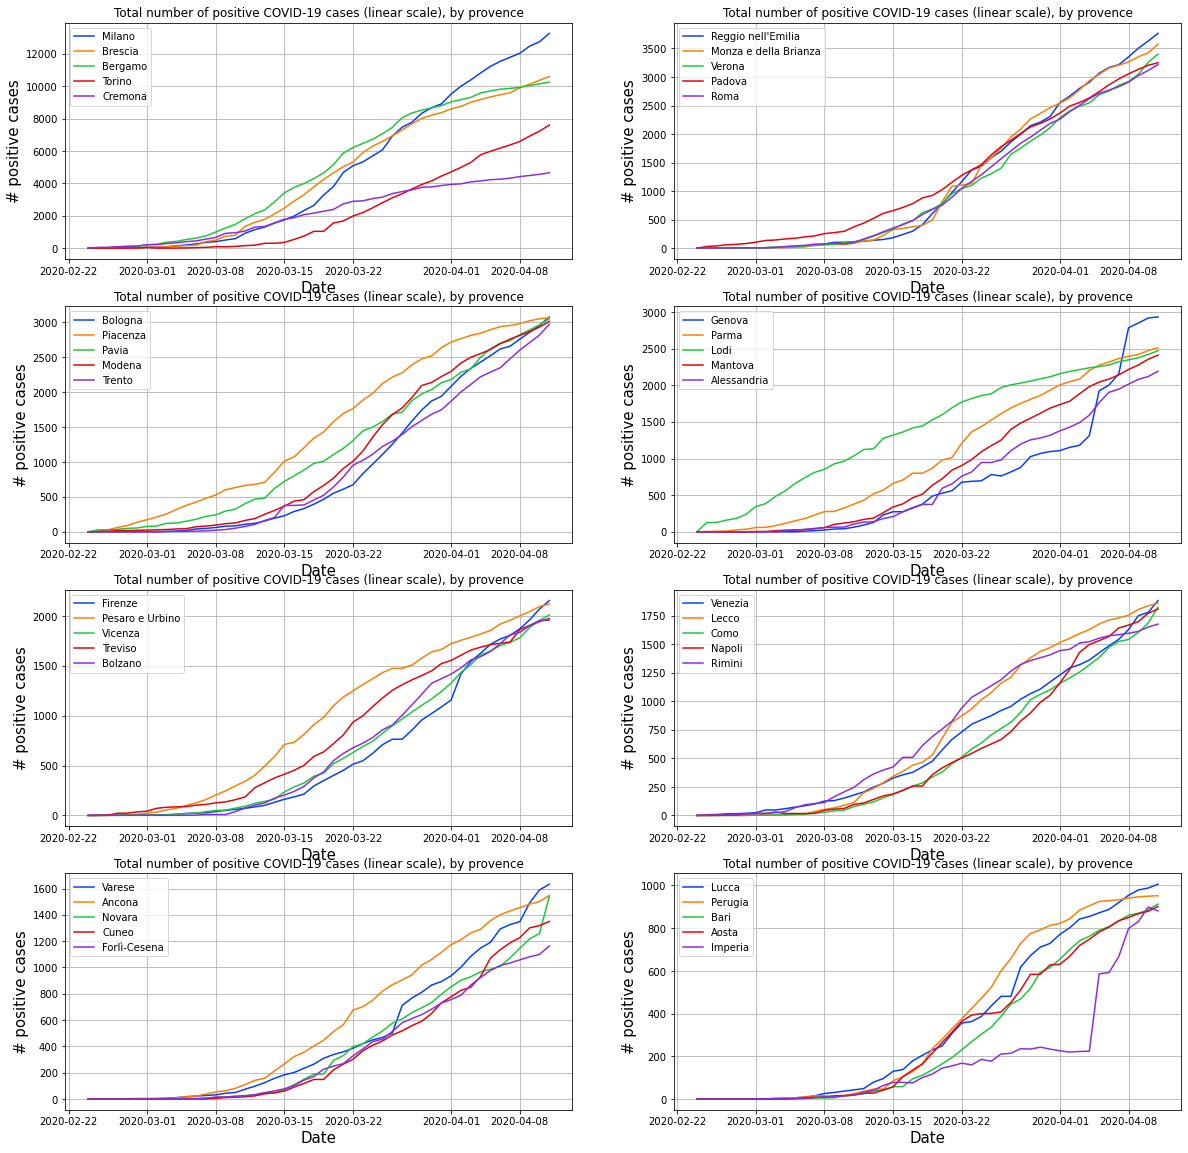

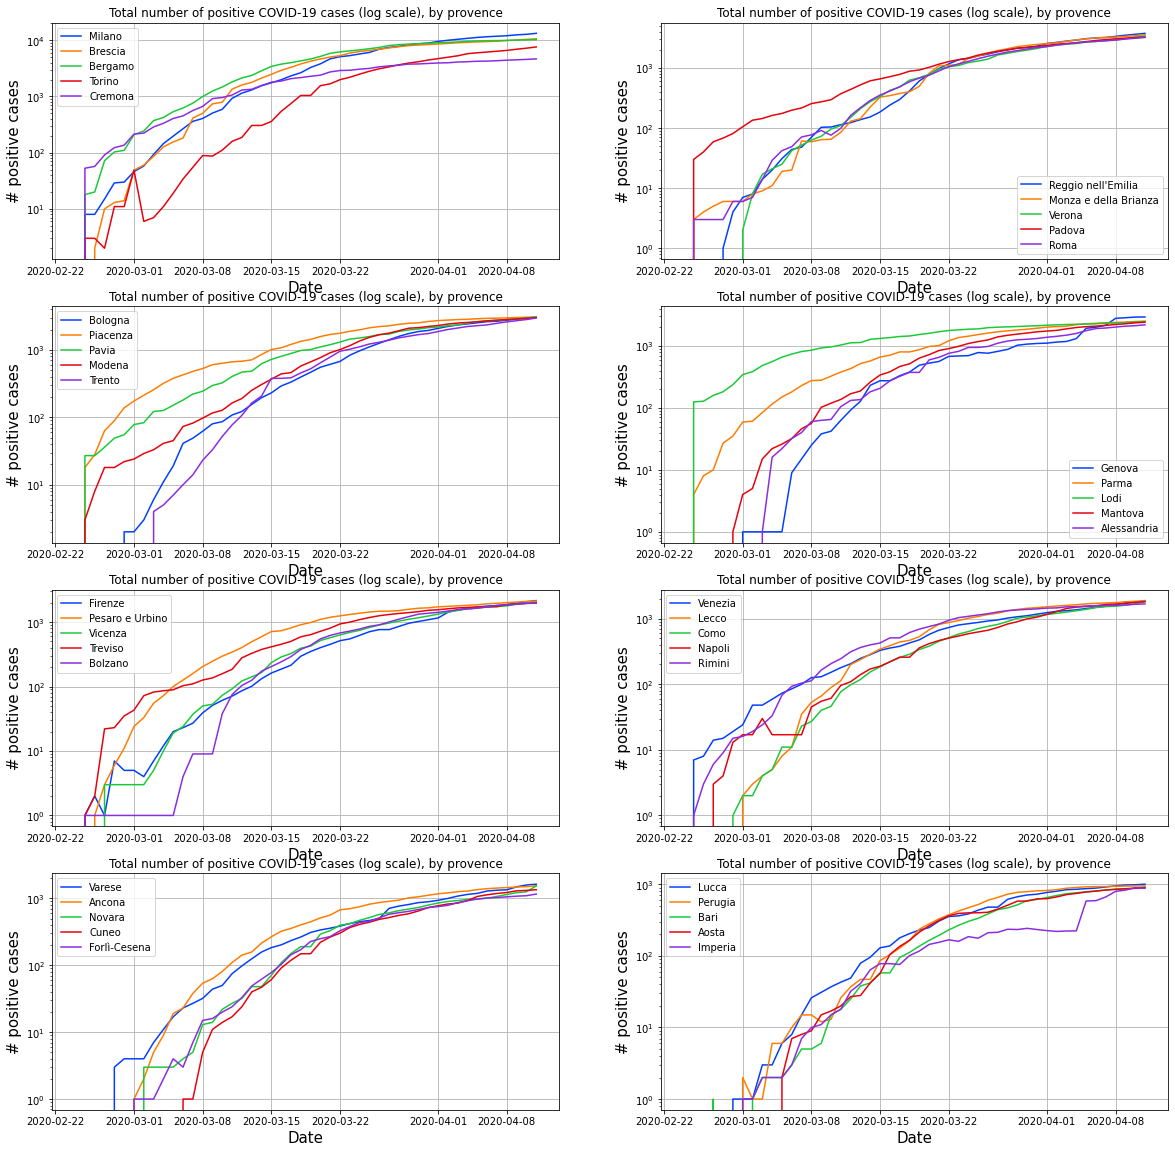

In [8]:
make_plot(dataset=conf, nrow=4, ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (linear scale), by provence',
          xlabel="Date", ylabel="# positive cases")

make_plot(dataset=conf, nrow=4, ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (log scale), by provence',
          xlabel="Date", ylabel="# positive cases",
         logy=True)

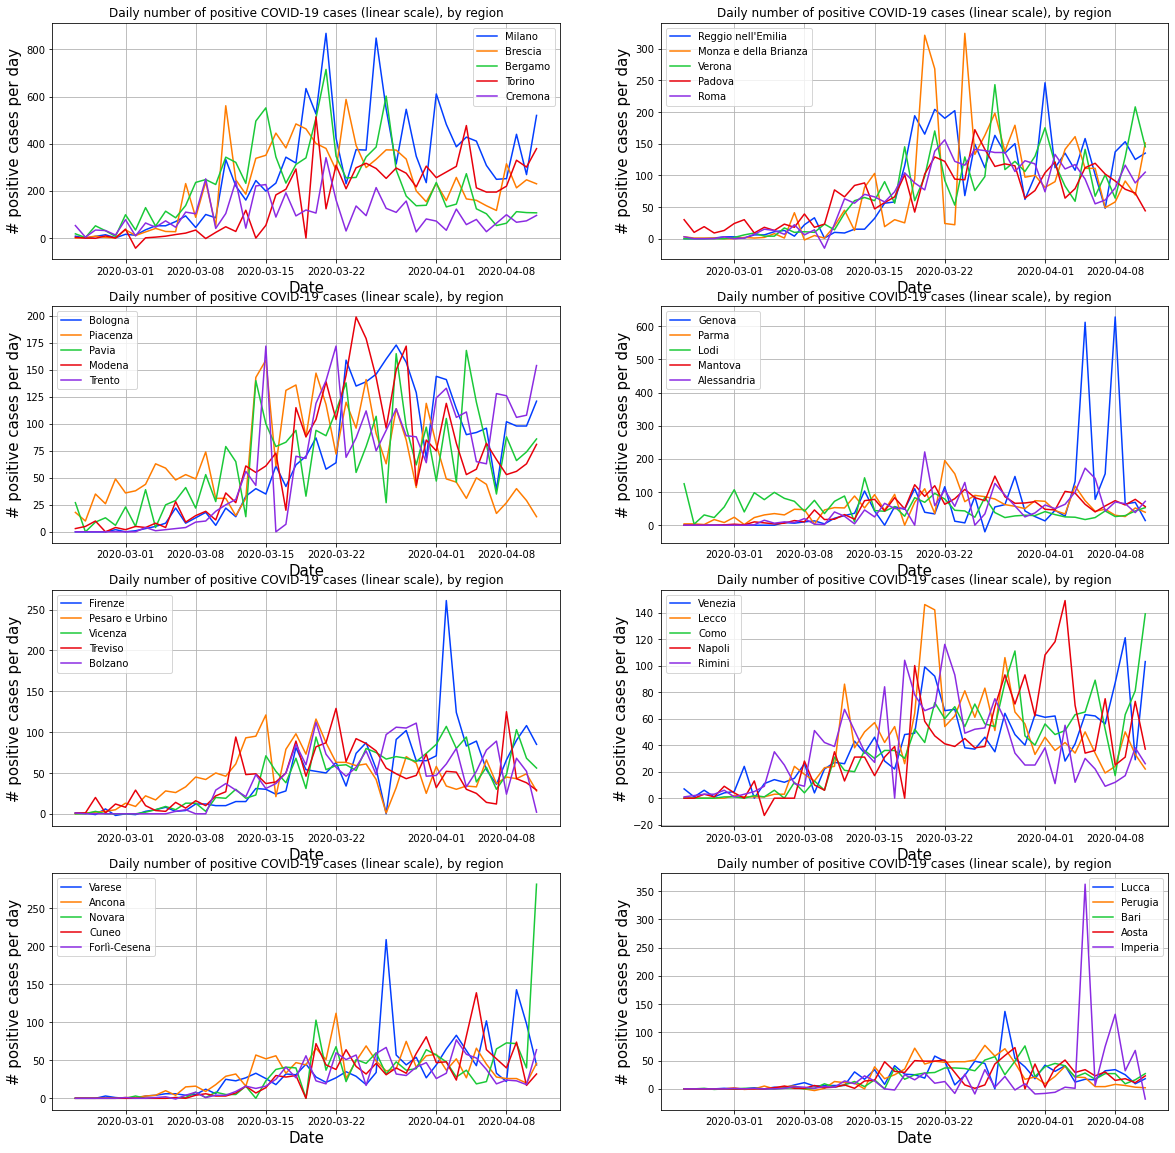

In [9]:
conf_daily = conf - conf.shift(1)

make_plot(dataset=conf_daily, nrow=4, ncol=2, contries_ordered=contries_ordered, 
          title='Daily number of positive COVID-19 cases (linear scale), by region',
          xlabel="Date", ylabel="# positive cases per day")

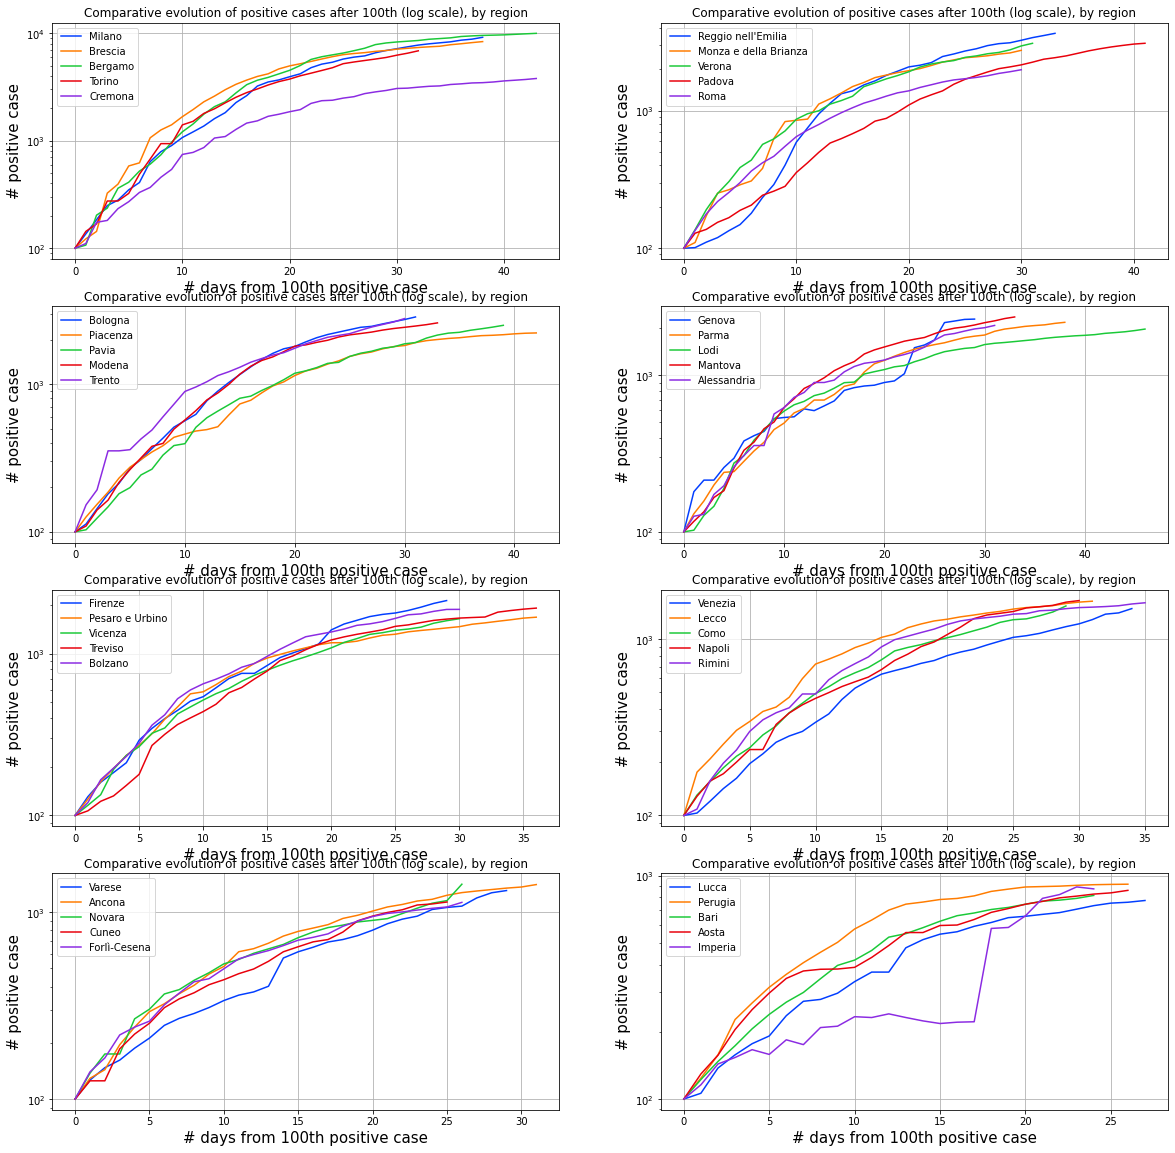

In [10]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

make_plot(dataset=conf_align_start, nrow=4, ncol=2, contries_ordered=contries_ordered,
          title='Comparative evolution of positive cases after 100th (log scale), by region',
          xlabel="# days from 100th positive case", ylabel="# positive case",
         logy=True)

In [11]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [12]:
# rename population country names that don't match COVID-19 data
# population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [13]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [14]:
print(population.columns.to_list())

['Torino', 'Vercelli', 'Novara', 'Cuneo', 'Asti', 'Alessandria', 'Imperia', 'Savona', 'Genova', 'La Spezia', 'Varese', 'Como', 'Sondrio', 'Milano', 'Bergamo', 'Brescia', 'Pavia', 'Cremona', 'Mantova', 'Trento', 'Verona', 'Vicenza', 'Belluno', 'Treviso', 'Venezia', 'Padova', 'Rovigo', 'Udine', 'Gorizia', 'Trieste', 'Piacenza', 'Parma', "Reggio nell'Emilia", 'Modena', 'Bologna', 'Ferrara', 'Ravenna', 'Forlì-Cesena', 'Pesaro e Urbino', 'Ancona', 'Macerata', 'Ascoli Piceno', 'Lucca', 'Pistoia', 'Firenze', 'Livorno', 'Pisa', 'Arezzo', 'Siena', 'Grosseto', 'Perugia', 'Terni', 'Viterbo', 'Rieti', 'Roma', 'Latina', 'Frosinone', 'Caserta', 'Benevento', 'Napoli', 'Avellino', 'Salerno', "L'Aquila", 'Teramo', 'Pescara', 'Chieti', 'Campobasso', 'Foggia', 'Bari', 'Taranto', 'Brindisi', 'Lecce', 'Potenza', 'Matera', 'Cosenza', 'Catanzaro', 'Reggio di Calabria', 'Trapani', 'Palermo', 'Messina', 'Agrigento', 'Caltanissetta', 'Enna', 'Catania', 'Ragusa', 'Siracusa', 'Sassari', 'Nuoro', 'Cagliari', 'Pord

In [15]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Torino,Vercelli,Novara,Cuneo,Asti,Alessandria,Imperia,Savona,Genova,La Spezia,...,Crotone,Vibo Valentia,Verbano-Cusio-Ossola,Monza e della Brianza,Fermo,Barletta-Andria-Trani,Aosta,Bolzano,Massa Carrara,Sud Sardegna
0,2.24449e+06,180272,367939,594729,223018,434050,224323,282298,874472,224635,...,167164,160294,164647,862084,181085,400524,NaN,NaN,NaN,NaN
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2020-02-25,3,0,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0.0,1.0,0.0,0.0
2020-02-26,3,0,0,0,0,0,0,10,0,1,...,0,0,0,4,0,0,0.0,1.0,0.0,0.0
2020-02-27,2,0,0,0,0,0,0,18,0,1,...,0,0,0,5,0,0,0.0,1.0,0.0,0.0


In [16]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [17]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Torino,Vercelli,Novara,Cuneo,Asti,Alessandria,Imperia,Savona,Genova,La Spezia,...,Lecco,Lodi,Rimini,Prato,Crotone,Vibo Valentia,Verbano-Cusio-Ossola,Monza e della Brianza,Fermo,Barletta-Andria-Trani
2020-04-07,28.4029,36.8887,29.1624,19.9587,28.204,44.8335,29.7339,18.0306,24.6663,20.6112,...,50.994,103.243,48.5064,13.6618,6.70001,3.74312,38.2637,37.189,17.3399,4.41921
2020-04-08,29.3831,37.6098,31.1465,20.6312,28.8318,46.4463,35.6183,23.167,31.8478,26.9326,...,51.701,104.399,48.8738,13.7015,6.75983,3.80551,43.6692,37.8617,18.4444,5.29307
2020-04-09,30.8534,38.4419,33.1033,21.8755,29.3698,47.9438,37.0448,23.2379,32.5797,27.5558,...,53.1739,105.689,49.3944,14.0987,6.75983,3.80551,47.0097,38.9173,18.7205,5.29307
2020-04-10,32.1944,39.274,34.1905,22.1614,31.5221,48.8193,40.0761,24.3006,33.3687,28.001,...,54.1461,107.602,50.5581,14.1781,6.75983,4.05505,47.9814,39.7177,18.9414,6.06705
2020-04-11,33.883,43.7672,41.8548,22.6994,33.4054,50.4781,39.2737,27.3116,33.5288,28.001,...,54.7942,109.96,51.3543,14.6944,6.75983,4.2422,52.1722,41.4693,19.5488,6.4915


In [18]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not country in ["Bolzano","Aosta"]]

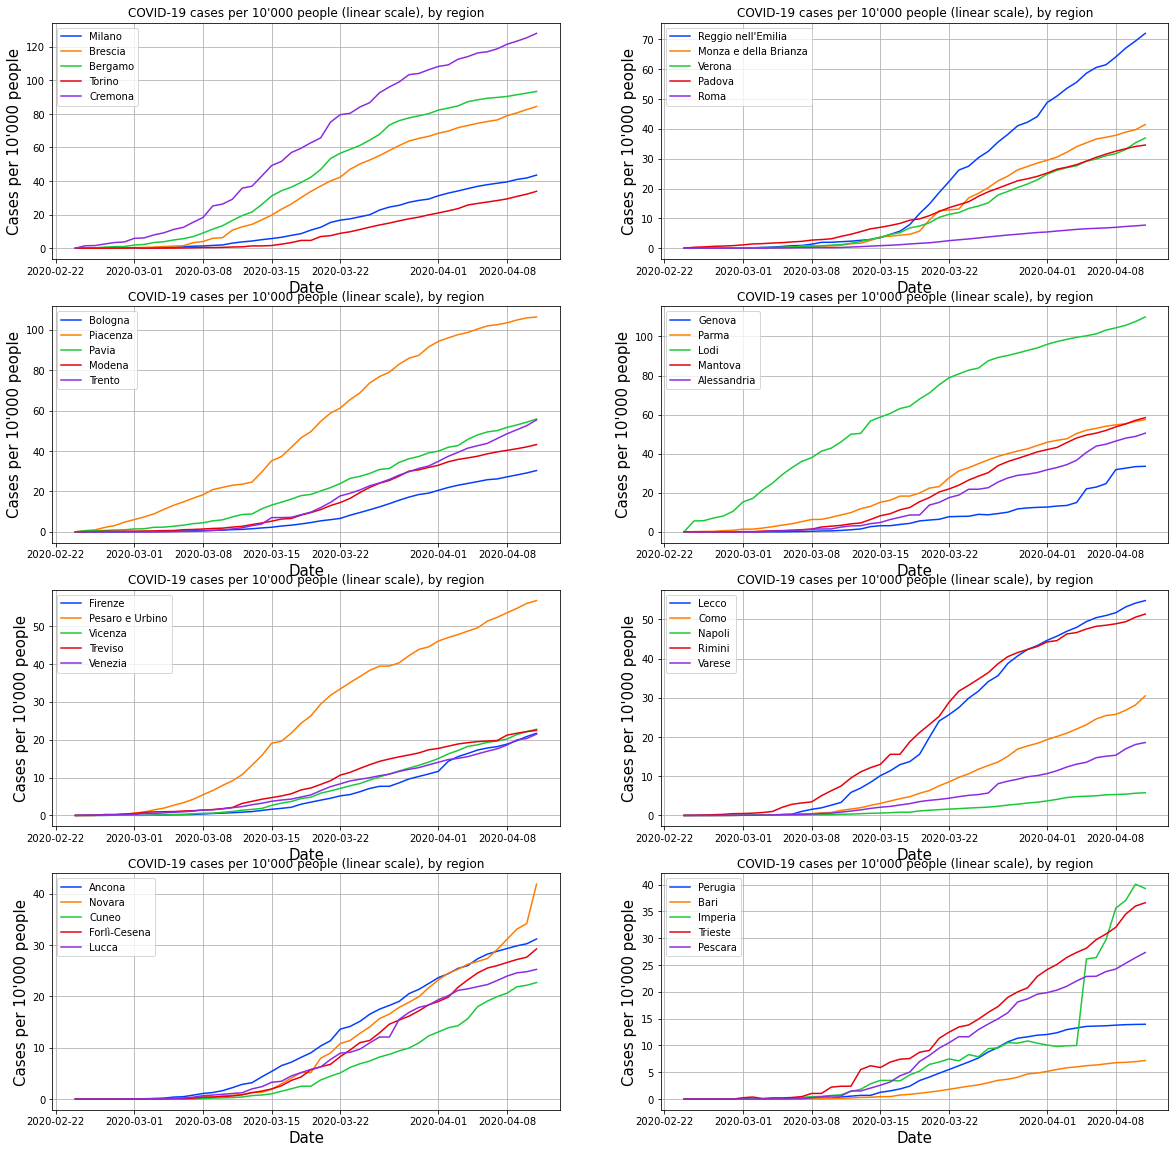

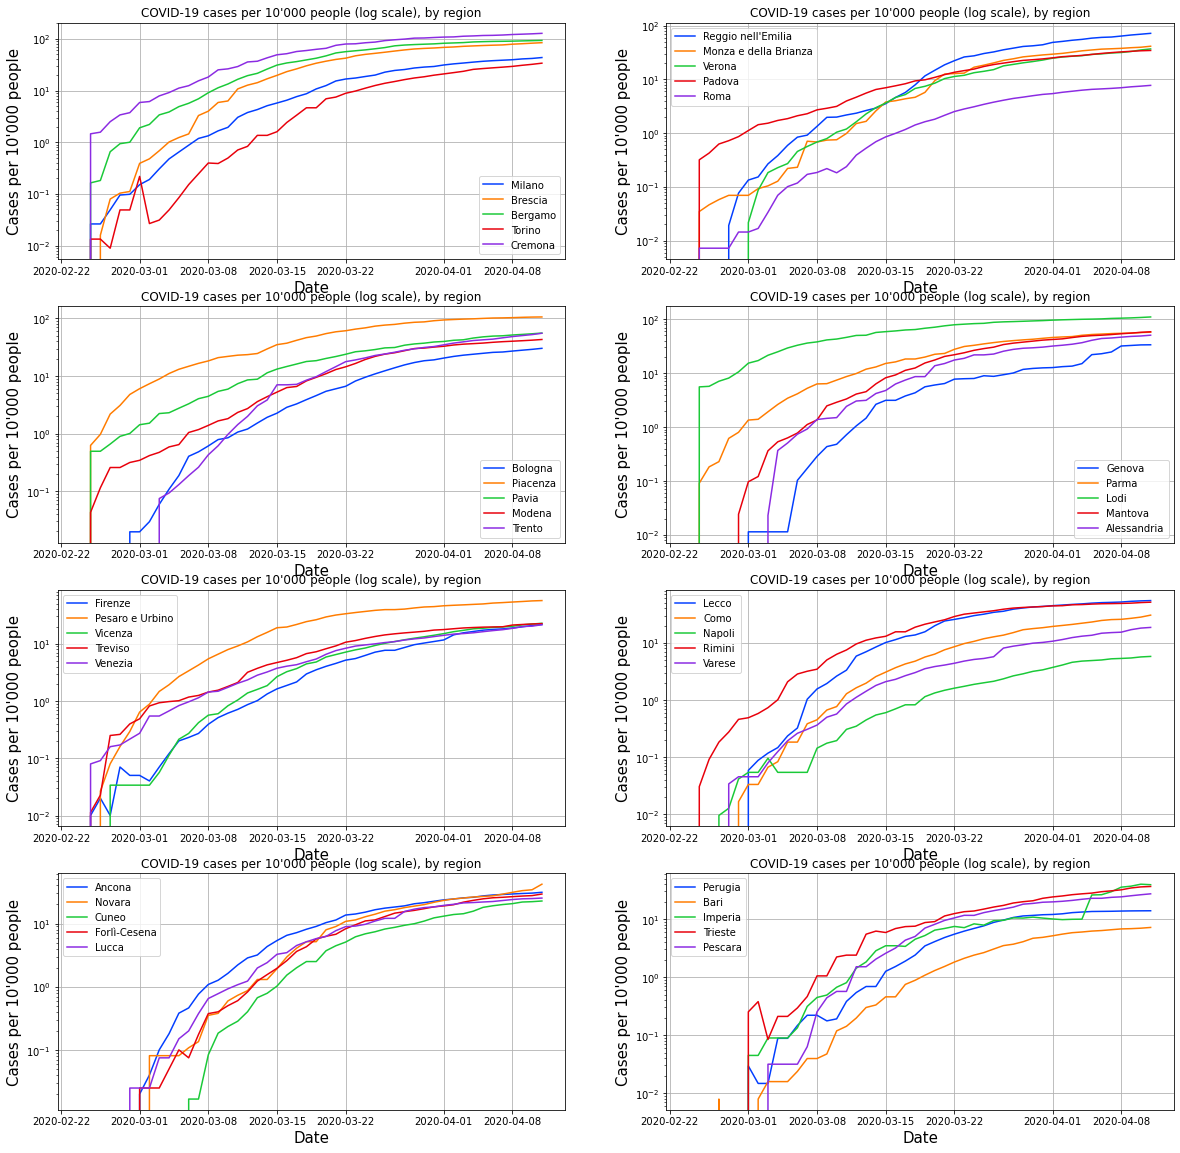

In [19]:
make_plot(dataset=conf_population_norm, nrow=4, ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (linear scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people")

make_plot(dataset=conf_population_norm, nrow=4, ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (log scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people",
         logy=True)